Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/diabetes_.csv')
print("Shape:", df.shape)

print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe(include='all'))


Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age    

In [8]:
df_clean = df.copy()
for column in df_clean.columns:
    if df_clean[column].isnull().sum() > 0:

        if np.issubdtype(df_clean[column].dtype, np.number):
            fill_value = df_clean[column].median()

        else:
            fill_value = df_clean[column].mode()[0]

        df_clean[column] = df_clean[column].fillna(fill_value)

print("Any missing values left?", df_clean.isnull().any().any())


Any missing values left? False


In [9]:
if "Outcome" in df_clean.columns:
    target = "Outcome"
else:
    target = df_clean.columns[-1]
    print("Target column not found as 'Outcome'. Using:", target)

X = df_clean.drop(target, axis=1).values
y = df_clean[target].values

total = len(X)
shuffled_idx = np.random.permutation(total)
cut = int(0.7 * total)

train_idx = shuffled_idx[:cut]
test_idx = shuffled_idx[cut:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 537
Testing samples: 231


In [10]:
def euclid_dist(p, q):
    return np.sqrt(np.sum((p - q)**2))

def knn_one(sample, X_train, y_train, k=5):
    distances = np.sqrt(np.sum((X_train - sample)**2, axis=1))

    k_idx = np.argpartition(distances, k)[:k]

    neighbor_labels = y_train[k_idx]

    unique_vals, counts = np.unique(neighbor_labels, return_counts=True)
    return unique_vals[np.argmax(counts)]

def knn_all(X_test, X_train, y_train, k=5):
    results = []
    for row in X_test:
        results.append(knn_one(row, X_train, y_train, k))
    return np.array(results)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [13]:
k_val = 5

start = time.time()
pred_base = knn_all(X_test, X_train, y_train, k=k_val)
end = time.time()

acc_base = accuracy(y_test, pred_base)

print("Unscaled KNN | k =", k_val,
      "| Accuracy =", round(acc_base, 4),
      "| Time =", round(end - start, 4), "seconds")


Unscaled KNN | k = 5 | Accuracy = 0.684 | Time = 0.0258 seconds


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [14]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

train_std[train_std == 0] = 1

X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled  = (X_test - train_mean) / train_std

In [32]:

def knn_predict(X_test, X_train, y_train, k=5):
    y_pred = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        nn_idx = np.argsort(distances)[:k]
        values, counts = np.unique(y_train[nn_idx], return_counts=True)
        y_pred.append(values[np.argmax(counts)])
    return np.array(y_pred)

k = 5
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"KNN (scaled) with k={k}: Accuracy = {accuracy_scaled:.4f}")


KNN (scaled) with k=5: Accuracy = 0.7143


In [29]:
print("Accuracy comparison for k=5:")
print(f"Unscaled data: {acc_base:.4f}")
print(f"Scaled data:   {accuracy_scaled:.4f}")
print("Note: Feature scaling can affect neighbor selection and model accuracy.")

Accuracy comparison for k=5:
Unscaled data: 0.6840
Scaled data:   0.7143
Note: Feature scaling can affect neighbor selection and model accuracy.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [46]:
ks = list(range(1, 16))
acc_unscaled_list, time_unscaled_list = [], []
acc_scaled_list, time_scaled_list = [], []

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

for k in ks:

    t0 = time.time()
    y_pred_u = knn_predict(X_train, y_train, X_test, k)
    t1 = time.time()
    acc_unscaled_list.append(accuracy(y_test, y_pred_u))
    time_unscaled_list.append(t1 - t0)

    t0 = time.time()
    y_pred_s = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    t1 = time.time()
    acc_scaled_list.append(accuracy(y_test, y_pred_s))
    time_scaled_list.append(t1 - t0)

best_k_unscaled = ks[np.argmax(acc_unscaled_list)]
best_k_scaled = ks[np.argmax(acc_scaled_list)]

print(f"Best k (unscaled): {best_k_unscaled} with accuracy {max(acc_unscaled_list):.4f}")
print(f"Best k (scaled):   {best_k_scaled} with accuracy {max(acc_scaled_list):.4f}")


Best k (unscaled): 1 with accuracy 0.9667
Best k (scaled):   1 with accuracy 0.9667


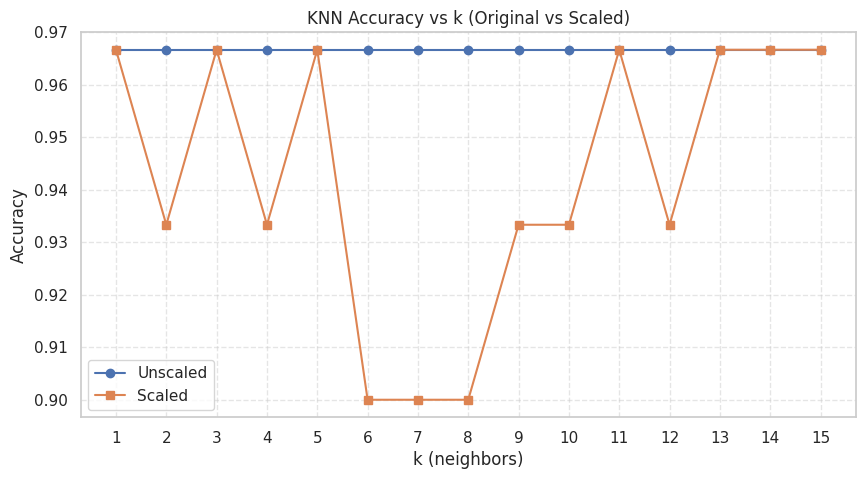

Best k (unscaled): 1 with accuracy 0.9667
Best k (scaled):   1 with accuracy 0.9667


In [53]:
plt.figure(figsize=(10, 5))
plt.plot(ks, acc_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, acc_scaled_list, marker='s', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k (Original vs Scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ks)
plt.legend()
plt.show()
print(f"Best k (unscaled): {best_k_unscaled} with accuracy {max(acc_unscaled_list):.4f}")
print(f"Best k (scaled):   {best_k_scaled} with accuracy {max(acc_scaled_list):.4f}")


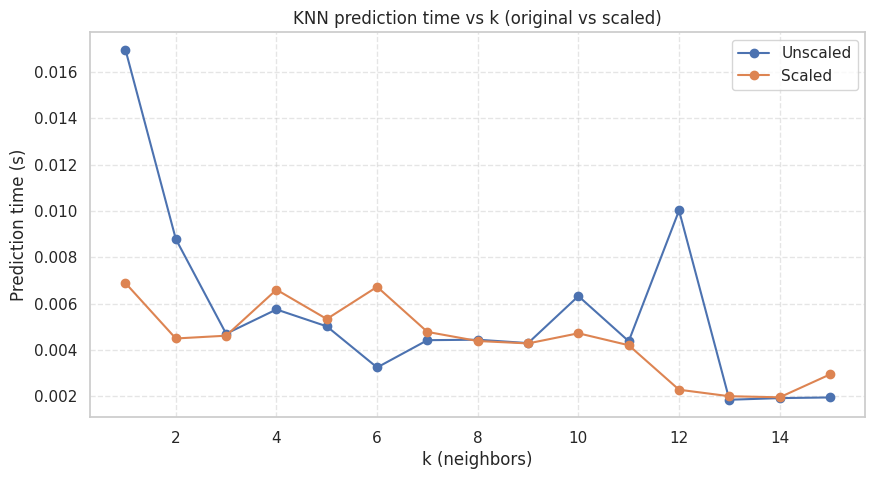

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(ks, time_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, time_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Prediction time (s)')
plt.title('KNN prediction time vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
